In [51]:
import pandas as pd
import numpy as np


In [52]:
data = pd.read_csv('visualizing_global_co2_data.csv')
data.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


Displaying the first rows/columns of the dataset.  We can note that there is many NaN values on the data. Then, we should avaliate our best options to tackle the problem.

In [53]:
# Calculate the total number of missing values in each column
missing_values = data.isnull().sum()

# Calculate the total number of values in each column
total_values = data.shape[0]

# Calculate the percentage of missing values in each column
percentage_missing = (missing_values / total_values) * 100

# Create a DataFrame to display the percentage of missing values
missing_data = pd.DataFrame({'Column': data.columns, 'Percentage Missing': percentage_missing})
print(missing_data)


                                                  Column  Percentage Missing
country                                          country            0.000000
year                                                year            0.000000
iso_code                                        iso_code           16.712123
population                                    population           20.929681
gdp                                                  gdp           71.216254
...                                                  ...                 ...
temperature_change_from_n2o  temperature_change_from_n2o           25.649235
total_ghg                                      total_ghg           87.847346
total_ghg_excluding_lucf        total_ghg_excluding_lucf           87.847346
trade_co2                                      trade_co2           91.582671
trade_co2_share                          trade_co2_share           91.584648

[79 rows x 2 columns]


1. Remove Rows or Columns: If the missing values are few and do not significantly affect our analysis, we may choose to remove rows or columns with missing values using the dropna() method.

2. Imputation: Replace missing values with a specific value. Common imputation methods include replacing missing values with the mean, median, mode, or a specific constant.

3. Forward or Backward Fill: Fill missing values using the values from the previous or next row.

4. Interpolation: Interpolate missing values based on other values in the dataset.

5. Using Machine Learning Models: Use machine learning models to predict missing values based on other features in the dataset.




Let us try some machine learning models to deal with the missing values !

1. K-Nearest Neighbors (KNN):KNN imputation involves finding the k nearest neighbors of each sample with missing values and averaging or taking a weighted average of their values to impute the missing values.
Decision Trees:

2. Decision trees can be used for imputation by treating missing values as a separate category and using the tree to predict the missing values based on other features.


- Columns with Low Missing Values (e.g., less than 20%):

For columns with relatively few missing values, you might consider imputation methods such as mean, median, mode imputation, or using more sophisticated methods like KNN imputation or interpolation.

- Columns with Moderate Missing Values (e.g., between 20% and 50%):

For columns with a moderate percentage of missing values, you could use more advanced imputation methods like KNN imputation, iterative imputation (e.g., MICE), or consider building predictive models to estimate missing values based on other features.

- Columns with High Missing Values (e.g., over 50%):

Columns with a high percentage of missing values may require careful consideration. Depending on the importance of these columns to your analysis, you might decide to drop them if they are not critical.

In [58]:
import pandas as pd
# Drop columns with over 50% missing values
columns_to_drop = missing_data[missing_data['Percentage Missing'] > 50]['Column']
data_cleaned = data.drop(columns_to_drop, axis=1)

# Print the remaining columns
print("Remaining columns after dropping columns with over 50% missing values:")
print(data_cleaned.columns)


Remaining columns after dropping columns with over 50% missing values:
Index(['country', 'year', 'iso_code', 'population', 'co2', 'co2_growth_abs',
       'co2_per_capita', 'cumulative_co2', 'cumulative_luc_co2',
       'land_use_change_co2', 'land_use_change_co2_per_capita',
       'share_global_co2', 'share_global_cumulative_co2',
       'share_global_cumulative_luc_co2', 'share_global_luc_co2',
       'share_of_temperature_change_from_ghg', 'temperature_change_from_ch4',
       'temperature_change_from_co2', 'temperature_change_from_ghg',
       'temperature_change_from_n2o'],
      dtype='object')


First : K-NN imputer: Filling the missing values

To handle columns with a moderate percentage of missing values (e.g., between 20% and 50%), we can use more advanced imputation methods such as KNN imputation, iterative imputation (e.g., MICE).


KNNImputer is a data transform that is first configured based on the method used to estimate the missing values.

The default distance measure is a Euclidean distance measure that is NaN aware, e.g. will not include NaN values when calculating the distance between members of the training dataset. This is set via the “metric” argument.

The number of neighbors is set to five by default and can be configured by the “n_neighbors” argument.

Finally, the distance measure can be weighed proportional to the distance between instances (rows), although this is set to a uniform weighting by default, controlled via the “weights” argument.

In [40]:
from sklearn.impute import KNNImputer
from numpy import isnan

In [61]:
from sklearn.impute import KNNImputer

# Extract columns with moderate missing values from cleaned dataset
columns_to_impute = missing_data[(missing_data['Percentage Missing'] >= 20) & (missing_data['Percentage Missing'] <= 50)]['Column']

# Extract numerical columns among columns to impute
numerical_columns_to_impute = data_cleaned[columns_to_impute].select_dtypes(include=['number']).columns

# Get indices of numerical columns to impute
ix = [data_cleaned.columns.get_loc(col) for col in numerical_columns_to_impute]

# Extract numerical data for imputation
X = data_cleaned[numerical_columns_to_impute].values

# Create KNNImputer and fit it on numerical data
imputer = KNNImputer()
imputer.fit(X)

# Transform the dataset using KNN imputation
X_imputed = imputer.transform(X)

# Replace original numerical columns with imputed values
data_cleaned[numerical_columns_to_impute] = X_imputed


Data analysis

In [69]:
data_cleaned.head()

,country,year,iso_code,population,co2,co2_growth_abs,co2_per_capita,cumulative_co2,cumulative_luc_co2,land_use_change_co2,land_use_change_co2_per_capita,share_global_co2,share_global_cumulative_co2,share_global_cumulative_luc_co2,share_global_luc_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o
0,Afghanistan,1850,AFG,3752993.0,0.0000,0.0000,0.1696,0.0000,2.931,2.931,0.781,0.0000,0.0000,0.121,0.121,NaN,0.0,NaN,NaN,0.0
1,Afghanistan,1851,AFG,3767956.0,0.1808,0.0194,0.1708,1.4254,5.899,2.968,0.788,0.0034,0.0006,0.119,0.118,0.165,0.0,0.0,0.0,0.0
2,Afghanistan,1852,AFG,3783940.0,0.1808,0.0298,0.4582,0.7568,8.867,2.968,0.784,0.0024,0.0002,0.118,0.116,0.164,0.0,0.0,0.0,0.0
3,Afghanistan,1853,AFG,3800954.0,0.1808,0.0306,0.1708,1.3102,11.871,3.004,0.790,0.0030,0.0006,0.118,0.115,0.164,0.0,0.0,0.0,0.0
4,Afghanistan,1854,AFG,3818038.0,0.1808,0.0280,0.9280,0.9872,14.876,3.004,0.787,0.0032,0.0004,0.117,0.114,0.163,0.0,0.0,0.0,0.0


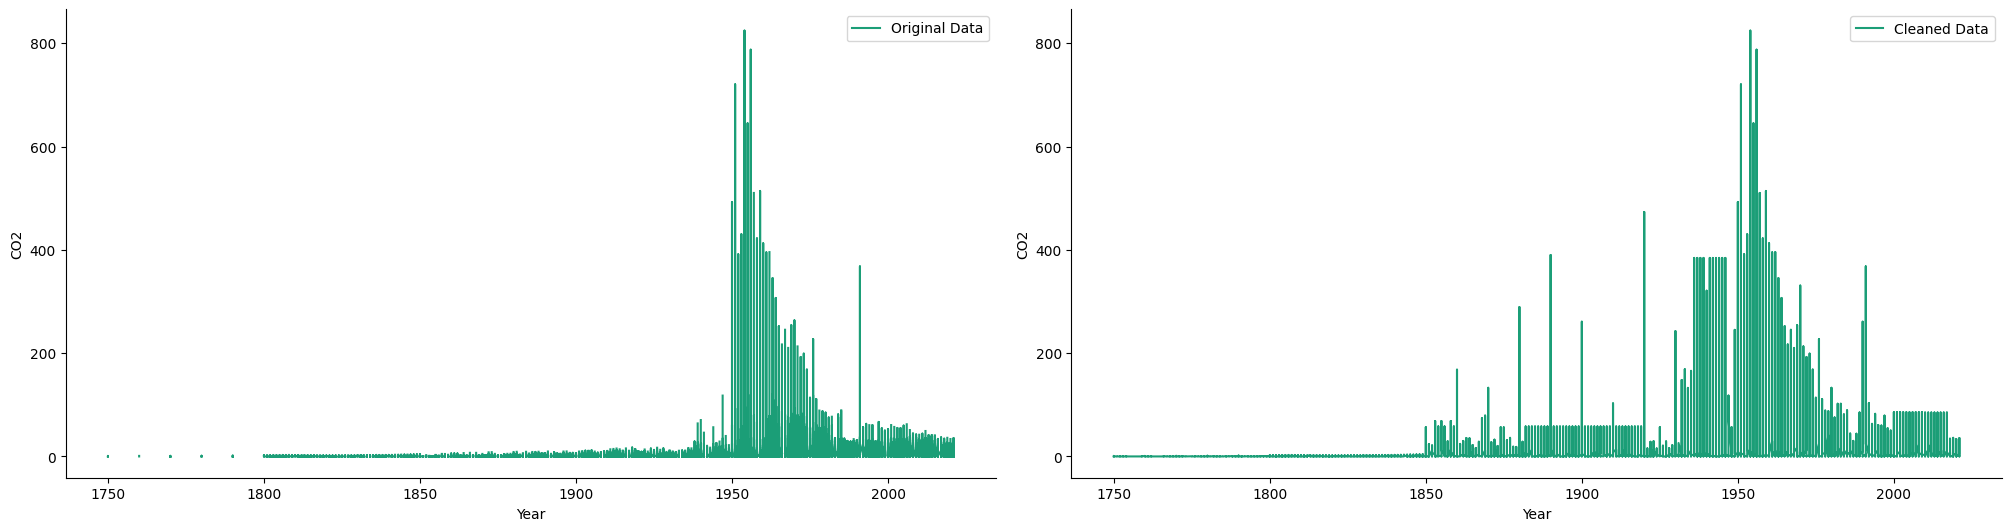

In [88]:
# @title year vs co2_per_capita

from matplotlib import pyplot as plt
import seaborn as sns

def _plot_series(series, series_name, ax, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['year']
    ys = series['co2_per_capita']

    ax.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, axs = plt.subplots(1, 2, figsize=(20, 5.2), constrained_layout=True)

# Plot original data
df_sorted_original = data.sort_values('year', ascending=True)
_plot_series(df_sorted_original, 'Original Data', axs[0])

# Plot cleaned data
df_sorted_cleaned = data_cleaned.sort_values('year', ascending=True)
_plot_series(df_sorted_cleaned, 'Cleaned Data', axs[1])

# Customize plot
for ax in axs:
    sns.despine(ax=ax)
    ax.set_xlabel('Year')
    ax.set_ylabel('CO2')
    ax.legend()

plt.show()

Comparing with original data

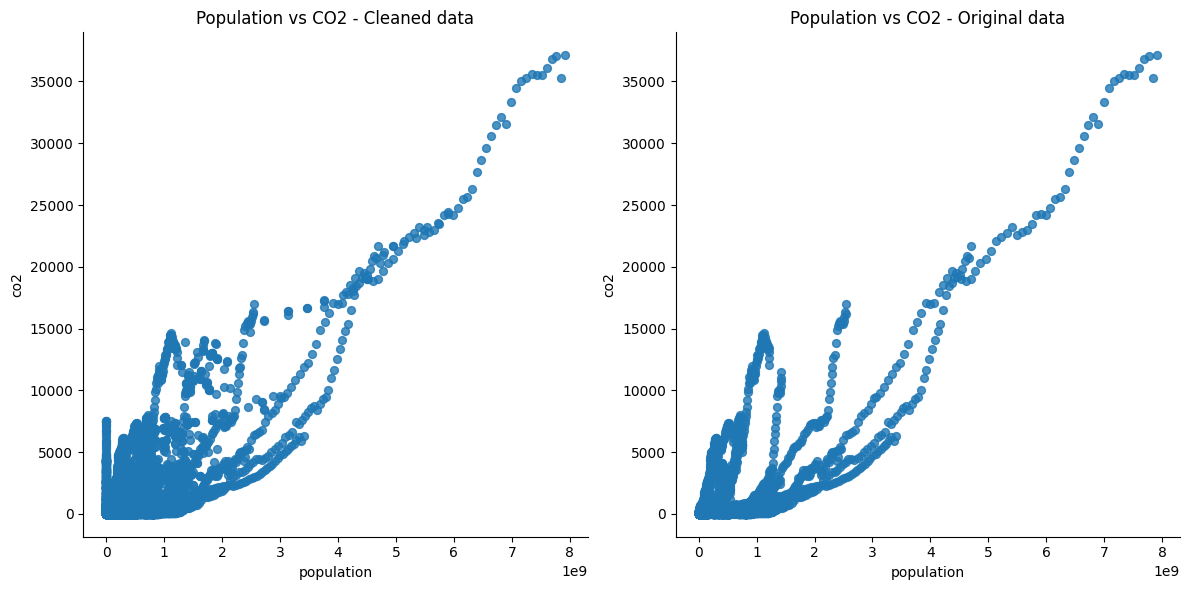

In [86]:
from matplotlib import pyplot as plt

# Create a figure and axes for subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot Population vs CO2 for cleaned data
data_cleaned.plot(kind='scatter', x='population', y='co2', s=32, alpha=.8, ax=axs[0])
axs[0].set_title('Population vs CO2 - Cleaned data')
axs[0].spines[['top', 'right']].set_visible(False)

# Plot Population vs CO2 for original data
data.plot(kind='scatter', x='population', y='co2', s=32, alpha=.8, ax=axs[1])
axs[1].set_title('Population vs CO2 - Original data')
axs[1].spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()


Now, using decision trees

In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import pandas as pd


# Drop columns with over 50% missing values
columns_to_drop = missing_data[missing_data['Percentage Missing'] > 50]['Column']
data_cleaned = data.drop(columns_to_drop, axis=1)

# Extract columns with moderate missing values from cleaned dataset
columns_to_impute = missing_data[(missing_data['Percentage Missing'] >= 20) & (missing_data['Percentage Missing'] <= 50)]['Column']

# Extract numerical columns among columns to impute
numerical_columns_to_impute = data_cleaned[columns_to_impute].select_dtypes(include=['number']).columns

# Split data into training and imputation sets
train_data = data_cleaned.dropna(subset=numerical_columns_to_impute)  # Training set with complete data
impute_data = data_cleaned[data_cleaned[numerical_columns_to_impute].isnull().any(axis=1)]  # Imputation set with missing values

# Define predictors (features- our columns to be filled ) and target variable
predictors = train_data.drop(columns=numerical_columns_to_impute)
target = train_data[numerical_columns_to_impute]

# Convert categorical variables to numeric using Label Encoding
label_encoder = LabelEncoder()
predictors_encoded = predictors.copy()
for column in predictors.columns:
    if predictors[column].dtype == 'object':
        predictors_encoded[column] = label_encoder.fit_transform(predictors[column])

# Ensure 'population' column is included in encoded predictors
if 'population' not in predictors_encoded.columns:
    predictors_encoded['population'] = train_data['population']

# Train Random Forest model for each column with missing values
imputed_values = {}
for column in numerical_columns_to_impute:
    # Exclude the current column from the predictors
    predictors_without_column = predictors_encoded.drop(columns=[column], errors='ignore')

    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(predictors_without_column, target[column])

    # Ensure 'population' column is included in impute predictors
    impute_predictors_with_column = impute_data.copy()
    if 'population' not in impute_predictors_with_column.columns:
        impute_predictors_with_column['population'] = impute_data['population']

    # Convert categorical variables to numeric using Label Encoding
    impute_predictors_encoded = impute_predictors_with_column.copy()
    for col in impute_predictors_with_column.columns:
        if impute_predictors_with_column[col].dtype == 'object':
            impute_predictors_encoded[col] = label_encoder.fit_transform(impute_predictors_with_column[col])

    # Exclude the current column from the impute predictors
    impute_predictors_without_column = impute_predictors_encoded.drop(columns=[column], errors='ignore')

    # Align the columns of imputation predictors with training predictors
    impute_predictors_aligned = impute_predictors_without_column.reindex(columns=predictors_without_column.columns, fill_value=0)

    # Check for missing values in impute_predictors_aligned and drop rows with missing values
    impute_predictors_aligned.dropna(inplace=True)

    # Make predictions
    imputed_values[column] = rf_model.predict(impute_predictors_aligned)

# Replace missing values in the original dataset
for column in numerical_columns_to_impute:
    # Get the indices of missing values in the column
    missing_indices = data_cleaned[column].index[data_cleaned[column].isnull()]

    # Ensure missing indices are valid and within the range of the imputed values
    missing_indices = missing_indices[missing_indices < len(imputed_values[column])]

    # Directly assign imputed values to missing values using numpy indexing
    data_cleaned.loc[missing_indices, column] = imputed_values[column][:len(missing_indices)]



In [110]:
data_cleaned.head()

,country,year,iso_code,population,co2,co2_growth_abs,co2_per_capita,cumulative_co2,cumulative_luc_co2,land_use_change_co2,land_use_change_co2_per_capita,share_global_co2,share_global_cumulative_co2,share_global_cumulative_luc_co2,share_global_luc_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o
0,Afghanistan,1850,AFG,3752993.0,2.22598,-0.01951,0.59574,34.34519,2.931,2.931,0.781,0.49978,0.22252,0.121,0.121,NaN,0.0,NaN,NaN,0.0
1,Afghanistan,1851,AFG,3767956.0,2.29262,0.06057,0.60623,34.43387,5.899,2.968,0.788,0.43467,0.22210,0.119,0.118,0.165,0.0,0.0,0.0,0.0
2,Afghanistan,1852,AFG,3783940.0,2.41365,0.46722,0.63829,33.28508,8.867,2.968,0.784,0.38622,0.20343,0.118,0.116,0.164,0.0,0.0,0.0,0.0
3,Afghanistan,1853,AFG,3800954.0,2.44090,0.19565,0.65217,34.17741,11.871,3.004,0.790,0.38608,0.19580,0.118,0.115,0.164,0.0,0.0,0.0,0.0
4,Afghanistan,1854,AFG,3818038.0,2.61821,0.55248,0.69533,35.05026,14.876,3.004,0.787,0.38603,0.19541,0.117,0.114,0.163,0.0,0.0,0.0,0.0


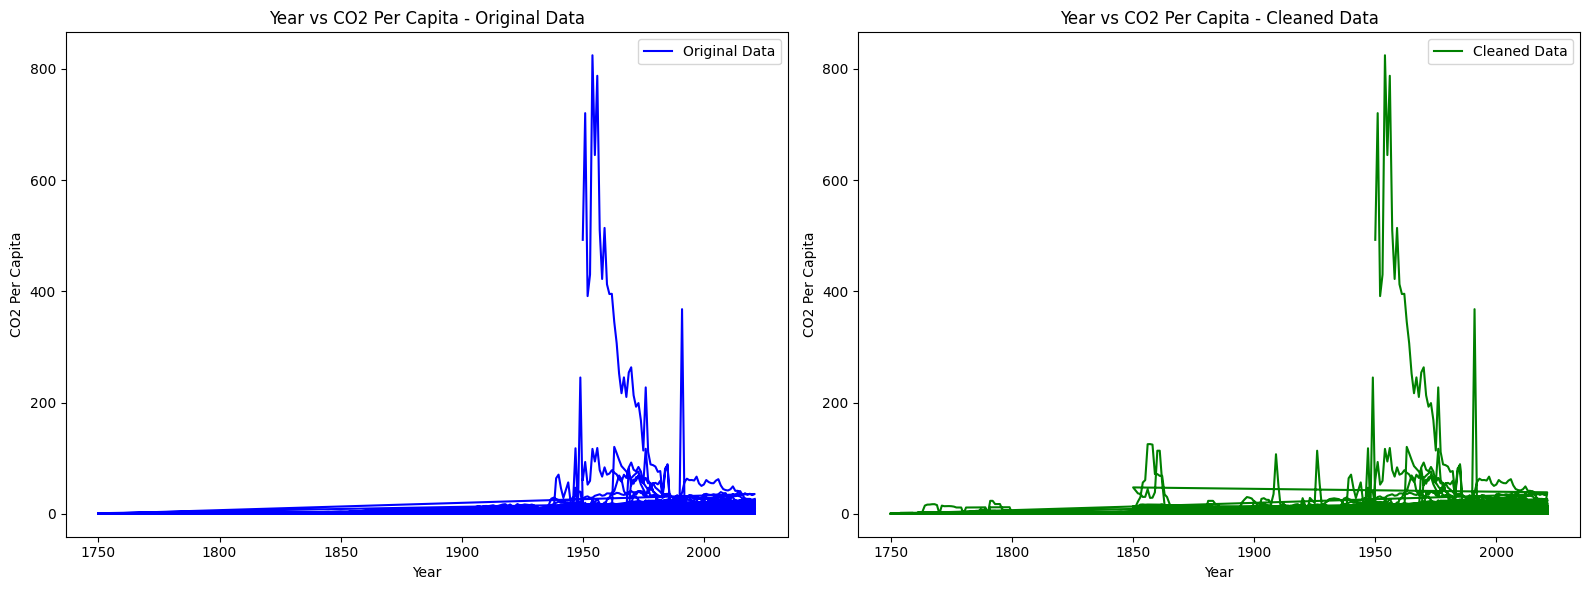

In [141]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the original data on the first subplot
ax1.plot(data['year'], data['co2_per_capita'], label='Original Data', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 Per Capita')
ax1.set_title('Year vs CO2 Per Capita - Original Data')

# Plot the cleaned data on the second subplot
ax2.plot(data_cleaned['year'], data_cleaned['co2_per_capita'], label='Cleaned Data', color='green')
ax2.set_xlabel('Year')
ax2.set_ylabel('CO2 Per Capita')
ax2.set_title('Year vs CO2 Per Capita - Cleaned Data')

# Add legend to both subplots
ax1.legend()
ax2.legend()

# Display the plot
plt.tight_layout()
plt.show()


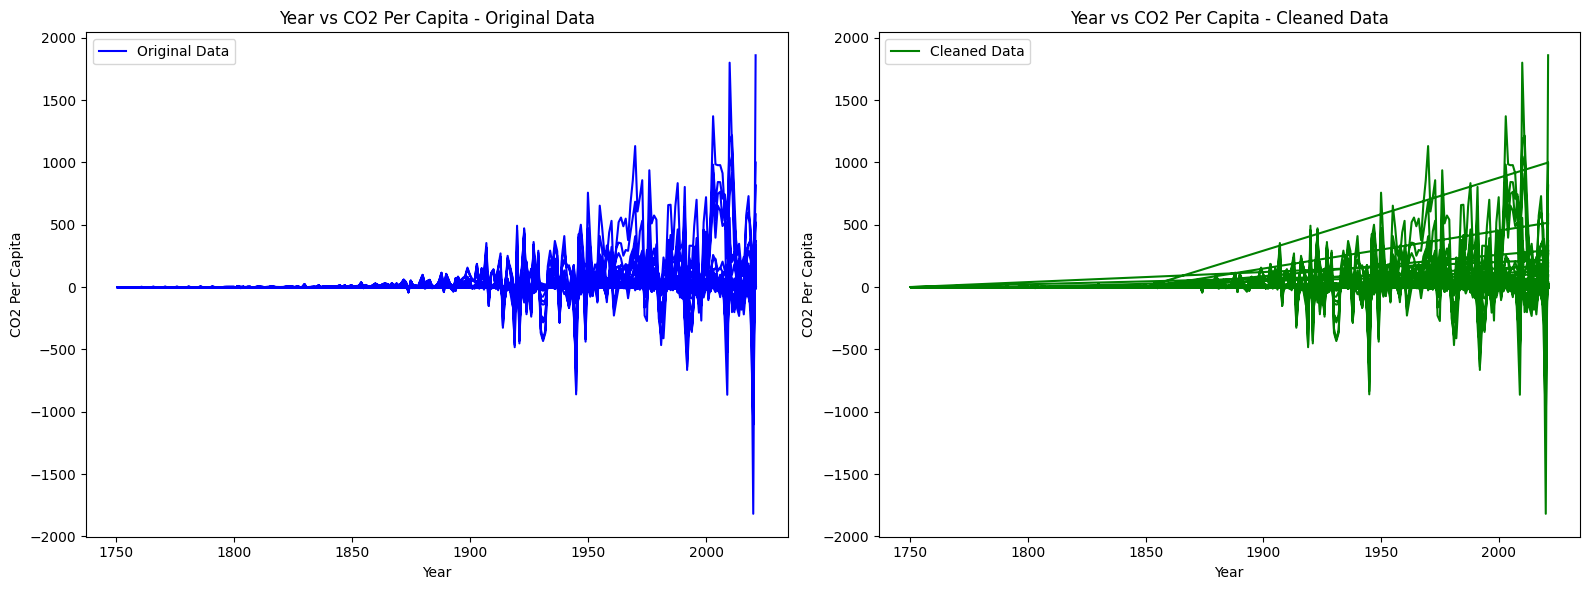

In [142]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the original data on the first subplot
ax1.plot(data['year'], data['co2_growth_abs'], label='Original Data', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 Per Capita')
ax1.set_title('Year vs CO2 Per Capita - Original Data')

# Plot the cleaned data on the second subplot
ax2.plot(data_cleaned['year'], data_cleaned['co2_growth_abs'], label='Cleaned Data', color='green')
ax2.set_xlabel('Year')
ax2.set_ylabel('CO2 Per Capita')
ax2.set_title('Year vs CO2 Per Capita - Cleaned Data')

# Add legend to both subplots
ax1.legend()
ax2.legend()

# Display the plot
plt.tight_layout()
plt.show()


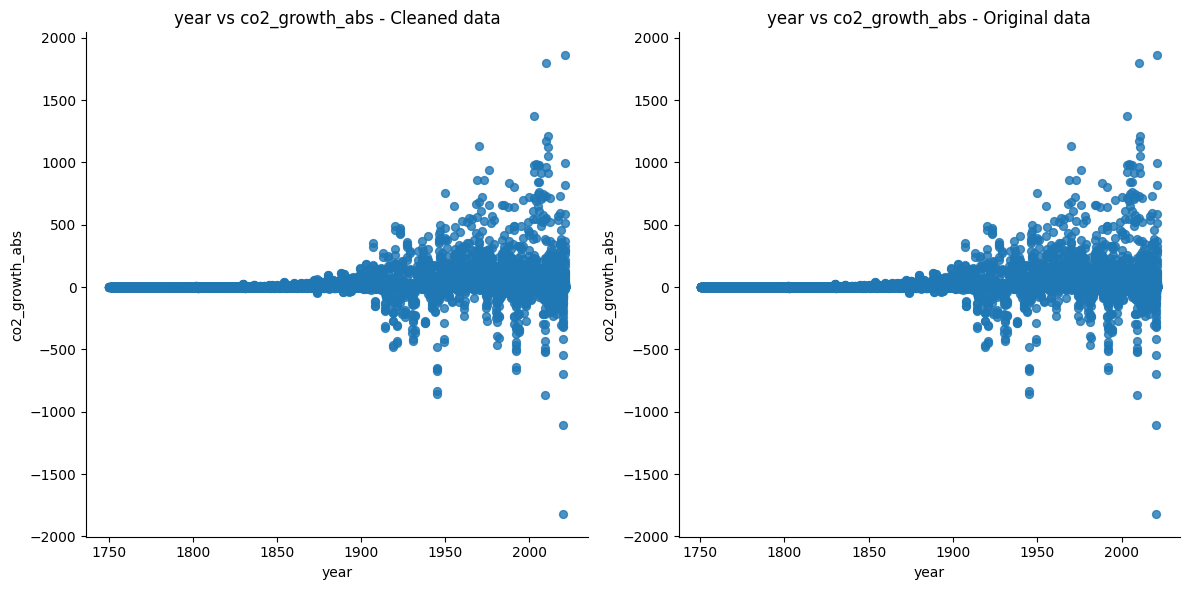

In [137]:
# @title year vs co2_growth_abs


# Create a figure and axes for subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot year vs population for cleaned data
data_cleaned.plot(kind='scatter', x='year', y='co2_growth_abs', s=32, alpha=.8, ax=axs[0])
axs[0].set_title('year vs co2_growth_abs - Cleaned data')
axs[0].spines[['top', 'right']].set_visible(False)

# Plot year vs population for original data
data.plot(kind='scatter', x='year', y='co2_growth_abs', s=32, alpha=.8, ax=axs[1])
axs[1].set_title('year vs co2_growth_abs - Original data')
axs[1].spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

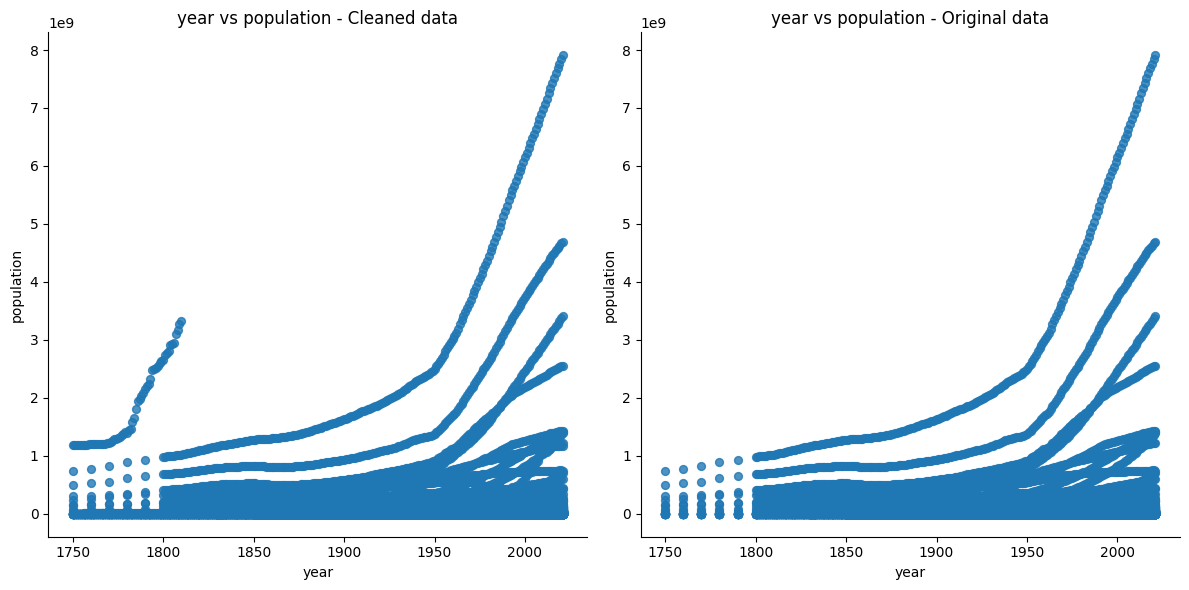

In [133]:
# @title year vs population

from matplotlib import pyplot as plt

# Create a figure and axes for subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot year vs population for cleaned data
data_cleaned.plot(kind='scatter', x='year', y='population', s=32, alpha=.8, ax=axs[0])
axs[0].set_title('year vs population - Cleaned data')
axs[0].spines[['top', 'right']].set_visible(False)

# Plot year vs population for original data
data.plot(kind='scatter', x='year', y='population', s=32, alpha=.8, ax=axs[1])
axs[1].set_title('year vs population - Original data')
axs[1].spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

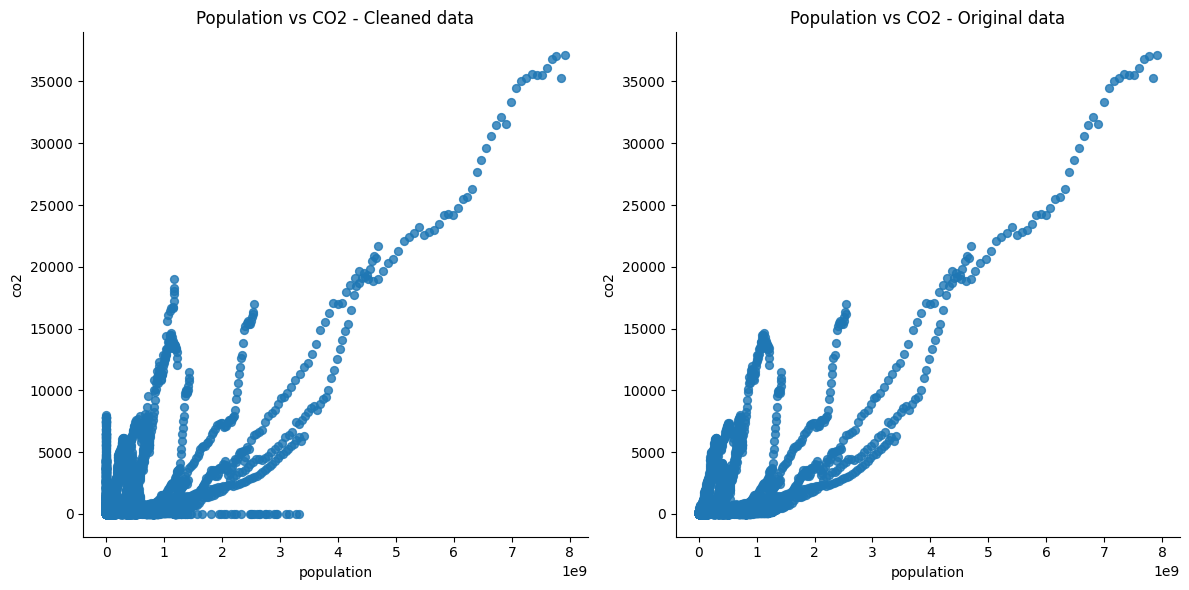

In [111]:
from matplotlib import pyplot as plt

# Create a figure and axes for subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot Population vs CO2 for cleaned data
data_cleaned.plot(kind='scatter', x='population', y='co2', s=32, alpha=.8, ax=axs[0])
axs[0].set_title('Population vs CO2 - Cleaned data')
axs[0].spines[['top', 'right']].set_visible(False)

# Plot Population vs CO2 for original data
data.plot(kind='scatter', x='population', y='co2', s=32, alpha=.8, ax=axs[1])
axs[1].set_title('Population vs CO2 - Original data')
axs[1].spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()